In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv
/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv


In [2]:
import pandas as pd
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [3]:
df_train = pd.read_csv("/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv")

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
# df_train = pd.read_csv("/content/drive/MyDrive/datasets_project/train_E6oV3lV.csv"
# , header=0)
# df_train.head(20)

In [6]:
df_train[df_train["label"] == 0]["tweet"].iloc[2]

'  bihday your majesty'

In [7]:
df_train.shape

(31962, 3)

In [8]:
df_train[df_train["label"] == 0].count()


id       29720
label    29720
tweet    29720
dtype: int64

In [9]:
#df.query('label == 0').count()
len(df_train[df_train["label"] == 0])

29720

In [10]:
len(df_train[df_train["label"] == 1])

2242

In [11]:
#df_test = pd.read_csv("/content/drive/MyDrive/datasets_project/test_tweets_anuFYb8.csv")

In [12]:
#df_test.shape

In [13]:
#df_test.head()

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

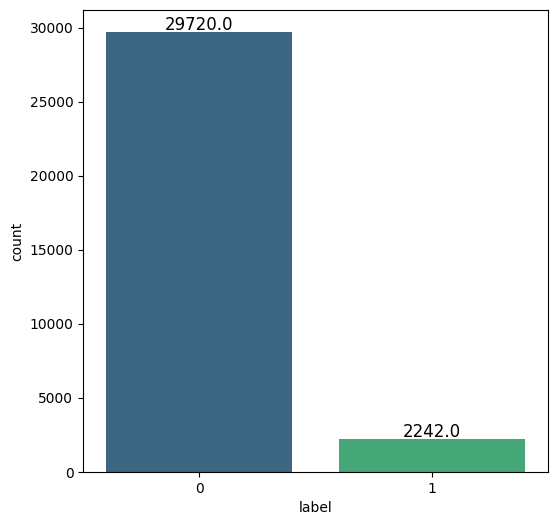

In [15]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_train, x="label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [16]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [17]:
df_train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [18]:
df_train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


## Cleanse Data

In [19]:
import re

In [20]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) #remove mentions
    text = re.sub(r"#\w+", "", text) #remove hashtags
    #text = re.sub(r"[^\w\s]", "", text) #remove special characters
    return text.lower().strip()

In [21]:
df_train['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [22]:
df_train['cleaned_tweet']= df_train['tweet'].apply(clean_text)

In [23]:
df_train.head(20)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !


In [24]:
def decode_text(text):
    try:
        #Handling the characters's error
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

In [25]:
def contains_invalid_encoding(text):
    # Check if text is a string and find invalid characters
    if isinstance(text, str):
        # Regex to find characters that are not valid Unicode 
        return bool(re.search(r'[^\x00-\x7F]+', text))  # Find characters outside the standard ASCII range
    return False 

In [26]:
# Ensure the 'tweet' column is of string type before applying the check function
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].astype(str)

df_train['decoded_tweet'] = df_train['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)

# Filter rows containing incorrectly encoded characters (outside the ASCII range)
invalid_tweets = df_train[df_train['cleaned_tweet'].apply(contains_invalid_encoding)]

invalid_tweets_after_decoding = df_train[df_train['cleaned_tweet'] != df_train['decoded_tweet']]

print("Tweets containing incorrectly encoded characters (outside the ASCII range):")
print(invalid_tweets[['cleaned_tweet']])  

Tweets containing incorrectly encoded characters (outside the ASCII range):
                                                                     cleaned_tweet
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
6                                                 camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­
8                                             we won!!! love the land!!!       â¦
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may
...                                                                            ...
31939                                       whew  ð it's a productive and   !!!
31942                                             this week is flying by    -   ¦
31945                                                    feel like... ðð¶ð
31955                                   less than 2 weeks ððð¼ð¹ððµ
31957      

In [27]:
print(f"Decoded tweets:")
print(invalid_tweets_after_decoding[['cleaned_tweet', 'decoded_tweet']])

Decoded tweets:
                                                                     cleaned_tweet  \
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
6                                                 camping tomorrow        dannyâ¦   
7      the next school year is the year for exams.ð¯ can't think about that ð­   
8                                             we won!!! love the land!!!       â¦   
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may   
...                                                                            ...   
31939                                       whew  ð it's a productive and   !!!   
31942                                             this week is flying by    -   ¦   
31945                                                    feel like... ðð¶ð   
31955                                   less than 2 weeks ððð¼ð¹ððµ   
31957               ate  isz that youu

In [28]:
repeated_char_train = []
for i, tweet in enumerate(df_train['decoded_tweet']):
  if re.match(r'\w*(\w)\1+',tweet):
    repeated_char_train.append(i)

In [29]:
len(repeated_char_train)

4583

In [30]:
#Repeated char function
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [31]:
df_train['clean_duplicate']=df_train['decoded_tweet'].apply(repeated_char)

In [32]:
df_train.head(20)

,id,label,tweet,cleaned_tweet,decoded_tweet,clean_duplicate
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation,factsguide: society now,factsguide: society now,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦,camping tomorrow danny…,camping tomorrow danny…
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­,the next school year is the year for exams.😯 can't think about that 😭,the next school year is the year for exams.😯 can't think about that 😭
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! â¦,we won!!! love the land!!! …,we won!!! love the land!!! …
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so !,welcome here ! i'm it's so !,welcome here ! i'm it's so !


## Emoji Processing

In [33]:
import emoji
def emoji_text_trans(text):
    text= emoji.demojize(text).replace (':', ' ')

    #delete repeated emoji
    tokenize= text.split()
    repeated_list=[]
    for word in tokenize:
        if word not in repeated_list:
            repeated_list.append(word)

    text=' '.join(word for word in repeated_list)
    text= text.replace("_", " ").replace("-", " ")
    return text

In [34]:
df_train["deemoji_tweet"] = df_train["clean_duplicate"].apply(emoji_text_trans)

In [35]:
from sklearn.model_selection import train_test_split
#label
y= df_train.label
#features
x=df_train.deemoji_tweet
#split into test and train dataset with test size 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.head()

26247                             did my first order at raising hands ... something black &amp; sexy from 's collection!
13681                              face with tears of joy it's there, although i'm told that andrew jackson was and also
25676                                                                           video on " has had enough of this crap!"
14544                                                                        after monaco a podium this time guys maybe?
25411    wow. us open amateur hour on fox. just show the golf and be quite! people walking in front of commentators air?
Name: deemoji_tweet, dtype: object

## Cleansing df_test

## Distill BERT

In [36]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
# Initial Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization and Tensor Creation
texts = x_train.tolist()
labels = y_train.tolist()
encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)
input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']
labels = torch.tensor(labels)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
# Dataset y DataLoader
dataset = TensorDataset(input_ids, attention_mask, labels)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)

# Class Weighting to Handle Imbalance
#class_weights = compute_class_weight('balanced', classes=np.unique(labels.numpy()), y=labels.numpy())
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=labels.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
# Training
epochs = 5
training_loss = []
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch in train_loader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask,
            labels=b_labels
        )
        #loss = outputs.loss
        loss = criterion(outputs.logits, b_labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    training_loss.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    save_path = "/content/drive/MyDrive/datasets_project"
    # Save the Model After Each Epoch
    model.save_pretrained(os.path.join(save_path, f"distilbert_model_epoch_{epoch + 1}"))
    tokenizer.save_pretrained(os.path.join(save_path, f"distilbert_model_epoch_{epoch + 1}"))

Epoch 1/5, Loss: 0.3876
Epoch 2/5, Loss: 0.2021
Epoch 3/5, Loss: 0.1023
Epoch 4/5, Loss: 0.0671
Epoch 5/5, Loss: 0.0575


In [48]:
# test_dataset = TensorDataset(input_ids, attention_mask)
# test_loader = DataLoader(test_dataset, batch_size=8)

# # Perform Batch Inference
# y_pred = []
# model.eval()
# with torch.no_grad():
#     for batch in test_loader:
#         b_input_ids, b_attention_mask = tuple(t.to(device) for t in batch)
#         outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask)
#         logits = outputs.logits
#         y_pred.extend(torch.argmax(logits, dim=1).cpu().numpy())

In [52]:
texts_test = x_test.tolist()  # Dữ liệu văn bản test
labels_test = y_test.tolist()  # Nhãn test

encoded_test_inputs = tokenizer(
    texts_test,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

test_input_ids = encoded_test_inputs['input_ids']
test_attention_mask = encoded_test_inputs['attention_mask']
test_labels = torch.tensor(labels_test)

# Tạo DataLoader cho tập test
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Đánh giá mô hình
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask
        )
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        correct += (predictions == b_labels).sum().item()
        total += b_labels.size(0)

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.9445


In [53]:
# # Đánh giá mô hình
# model.eval()
# correct_0 = 0  # Dự đoán đúng cho nhãn 0
# correct_1 = 0  # Dự đoán đúng cho nhãn 1
# total_0 = 0    # Tổng số mẫu có nhãn 0
# total_1 = 0    # Tổng số mẫu có nhãn 1

# with torch.no_grad():
#     for batch in test_loader:
#         b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

#         outputs = model(
#             input_ids=b_input_ids,
#             attention_mask=b_attention_mask
#         )
#         logits = outputs.logits
#         predictions = torch.argmax(logits, dim=-1)

#         # Tính số dự đoán đúng cho nhãn 0 và 1
#         correct_0 += ((predictions == 0) & (b_labels == 0)).sum().item()
#         correct_1 += ((predictions == 1) & (b_labels == 1)).sum().item()

#         # Tính tổng số mẫu cho nhãn 0 và 1
#         total_0 += (b_labels == 0).sum().item()
#         total_1 += (b_labels == 1).sum().item()

# # Tính accuracy cho từng nhãn
# accuracy_0 = correct_0 / total_0 if total_0 > 0 else 0
# accuracy_1 = correct_1 / total_1 if total_1 > 0 else 0

# print(f"Accuracy for label 0: {accuracy_0:.4f}")
# print(f"Accuracy for label 1: {accuracy_1:.4f}")


Accuracy for label 0: 0.9648
Accuracy for label 1: 0.6741


In [55]:
from sklearn.metrics import classification_report

# Đánh giá mô hình
model.eval()
y_true = []  # Nhãn thực tế
y_pred = []  # Dự đoán của mô hình

with torch.no_grad():
    for batch in test_loader:
        b_input_ids, b_attention_mask, b_labels = tuple(t.to(device) for t in batch)

        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask
        )
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        y_true.extend(b_labels.cpu().numpy())  # Lưu nhãn thực tế
        y_pred.extend(predictions.cpu().numpy())  # Lưu dự đoán

# In ra classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['No Hate', 'Hate']))



Classification Report:

              precision    recall  f1-score   support

     No Hate       0.98      0.96      0.97      5945
        Hate       0.59      0.67      0.63       448

    accuracy                           0.94      6393
   macro avg       0.78      0.82      0.80      6393
weighted avg       0.95      0.94      0.95      6393



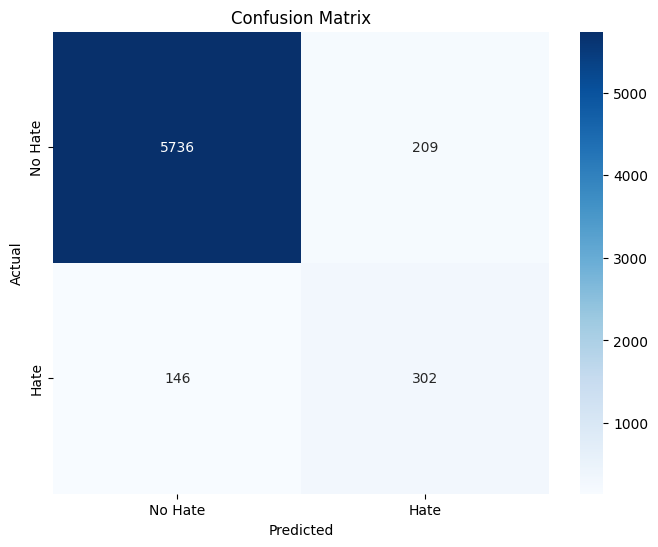

In [56]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate'], yticklabels=['No Hate', 'Hate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

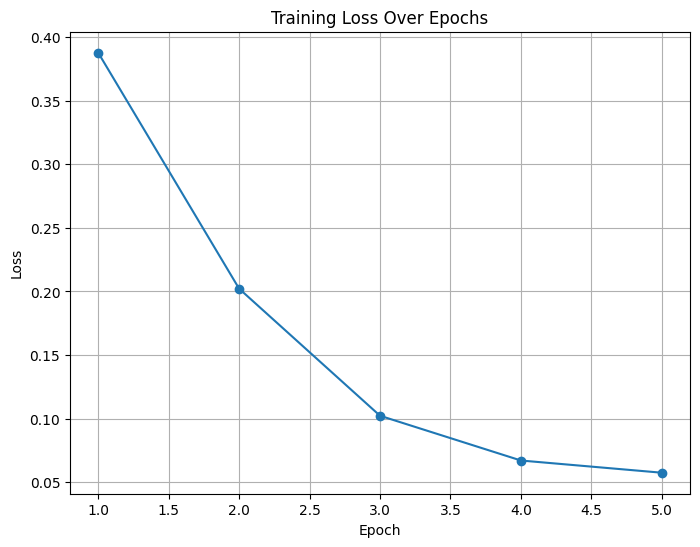

In [57]:
# Loss Visualization
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), training_loss, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [58]:
model.save_pretrained("/kaggle/working/optimized_distilbert")
tokenizer.save_pretrained("/kaggle/working/optimized_distilbert")

('/kaggle/working/optimized_distilbert/tokenizer_config.json',
 '/kaggle/working/optimized_distilbert/special_tokens_map.json',
 '/kaggle/working/optimized_distilbert/vocab.txt',
 '/kaggle/working/optimized_distilbert/added_tokens.json')

In [62]:
import shutil

# Nén thư mục mô hình thành file zip
shutil.make_archive('/kaggle/working/optimized_distilbert.zip', 'zip', '/kaggle/working', 'optimized_distilbert')

'/kaggle/working/optimized_distilbert.zip.zip'

In [63]:
from IPython.display import FileLink
FileLink(r'optimized_distilbert.zip.zip')

/kaggle/working/optimized_distilbert.zip.zip